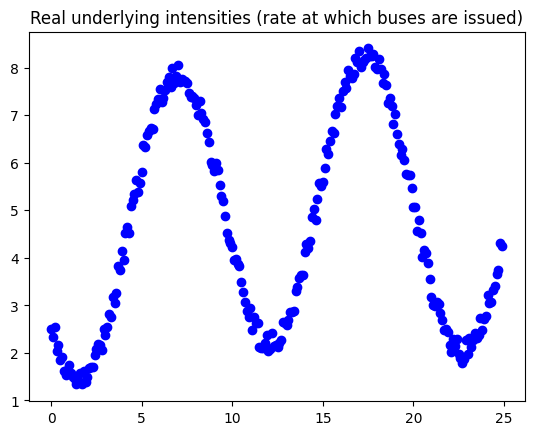

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  250
Model:                            GLM   Df Residuals:                      242
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                        0.020661
Method:                          IRLS   Log-Likelihood:                 134.30
Date:                Tue, 17 Oct 2023   Deviance:                       4.9986
Time:                        10:26:22   Pearson chi2:                     5.00
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5847      0.089     29.109      0.0

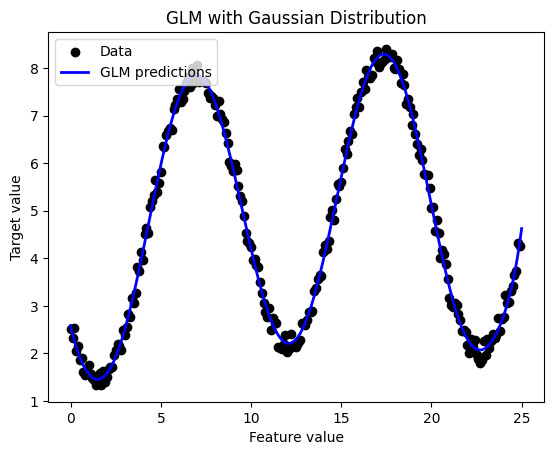

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Function to generate data
def generate_data():
    X_train = np.arange(0, 25, 0.1)
    Y_train = 4 + 3 * np.sin(10 + 0.6 * X_train) + np.sin(0.1 * X_train) + np.random.uniform(0, 0.5, size=X_train.shape)
    return X_train, Y_train

# Function to prepare features
def prepare_features(X, degree):
    X_reshaped = X.reshape(-1, 1)
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = polynomial_features.fit_transform(X_reshaped)
    return X_poly

# Function to build and train GLM
def train_glm(X, y):
    glm_model = sm.GLM(y, sm.add_constant(X), family=sm.families.Gaussian())
    glm_results = glm_model.fit()
    return glm_results

# Function for predictions
def predict(glm_results, X):
    y_pred = glm_results.predict(sm.add_constant(X))
    return y_pred

# Generate data
X_train, Y_train = generate_data()

# Visualize generated data
plt.scatter(X_train, Y_train, color='blue', marker='o', label='Data')
plt.title('Real underlying intensities (rate at which buses are issued)')
plt.show()

# Prepare polynomial features
degree = 10  # Degree of polynomial features
X_poly = prepare_features(X_train, degree)

# Train GLM
glm_results = train_glm(X_poly, Y_train)

# Display summary of the model
print(glm_results.summary())

# Prepare new data for prediction and visualize
X_new = np.linspace(0, 25, 1000)
X_new_poly = prepare_features(X_new, degree)
y_new = predict(glm_results, X_new_poly)

plt.scatter(X_train, Y_train, color='black', marker='o', label='Data')
plt.plot(X_new, y_new, color='blue', linewidth=2, label='GLM predictions')
plt.legend(loc="upper left")
plt.xlabel("Feature value")
plt.ylabel("Target value")
plt.title("GLM with Gaussian Distribution")
plt.show()


### 1. Model:

In Poisson regression, we assume that the response variable Y follows a Poisson distribution and that the logarithm of its expected value can be modeled by a linear combination of unknown parameters. The equation for the expected value of $(Y_i$) is:

$[
\log(E[Y_i | X_i]) = \log(\lambda_i) = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip}
$]

or

$[
E[Y_i | X_i] = \lambda_i = \exp(\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip})
$]

where ($\lambda_i\$) is the expected value of response (i\) and the \(X\) values are the features.

### 2. Cost Function:

For a set of parameters, $(\beta)$, the log-likelihood $L(\beta)$ of observing $(Y_1, Y_2,...,Y_n$) given features $(X_1, X_2,...,X_n)$ is:

$[
L(\beta) = \sum_{i=1}^{n} [Y_i \cdot \log(\lambda_i) - \lambda_i - \log(Y_i!)]
$]

where $\lambda_i = \exp(\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip})$ and $(Y_i$) are the actual counts.

### 3. Derivative of the Cost Function:

The derivative of the log-likelihood with respect to $(\beta_j$) is:

$[
\frac{\partial L(\beta)}{\partial \beta_j} = \sum_{i=1}^{n} X_{ij} \cdot (Y_i - \exp(\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip}))
$]

where $(X_{ij}$) is the $(j$)-th feature for observation $(i$).
